## Support Vector Regression
### Diamond Dataset

Vorhersage des Preises für Diamanten

<img src="https://upload.wikimedia.org/wikipedia/commons/6/6f/Brillanten.jpg" width="300" height="300" />

***

#### Import der Bibliotheken

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import altair as alt

#### Import des Datensatzes und erste Analysen

In [2]:
url="https://raw.githubusercontent.com/Pratik-Bhujade/Diamond-Dataset/master/DiamondData.csv"
df=pd.read_csv(url)
df.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.50,Fair,G,SI1,64.5,57.0,10352.0,7.15,7.09,4.59
1,0.70,Ideal,E,VS2,61.4,57.0,2274.0,5.72,5.78,3.53
2,1.22,Premium,G,VS1,61.3,58.0,8779.0,6.91,6.89,4.23
3,0.51,Premium,E,VS2,62.5,60.0,1590.0,5.08,5.10,3.18
4,2.02,Very Good,J,SI2,59.2,60.0,11757.0,8.27,8.39,4.91
5,0.70,Very Good,E,SI1,63.2,61.0,2164.0,5.61,5.49,3.51
6,0.46,Ideal,G,VVS1,60.7,57.0,1453.0,4.98,5.03,3.04
7,0.55,Premium,F,SI2,60.6,58.0,1175.0,5.28,5.31,3.21
8,0.51,Ideal,G,VVS2,61.6,56.0,1750.0,5.12,5.14,3.16
9,0.50,Ideal,H,VS2,62.3,55.0,1921.0,5.09,5.12,3.18


<ul>
<li>carat = Gewicht des Diamanten 0,2 Gramm</li>
<li>cut = Qualität des Schnittes (Fair, Good, Very Good, Premium, Ideal)</li>
<li>color = Diamant Farbe: J (worst) to D (best)</li>
<li>clarity = Klarheit des Diamants: (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))</li>
<li>price = Preis in US $</li>
<li>x, y, z = Länge, Breite, Tiefe in mm</li>
<li>depth = Gesamttiefe in Prozent: z / mean(x, y) = 2 * z / (x + y))</li>
<li>table = Breite der Rautenspitze relativ zur breitesten Stelle; zwischen 43-95 mm</li>
</ul>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    50000 non-null  float64
 1   cut      50000 non-null  object 
 2   color    50000 non-null  object 
 3   clarity  50000 non-null  object 
 4   depth    49529 non-null  float64
 5   table    49610 non-null  float64
 6   price    49747 non-null  float64
 7   x        49779 non-null  float64
 8   y        49667 non-null  float64
 9   z        49572 non-null  float64
dtypes: float64(7), object(3)
memory usage: 3.8+ MB


<p>Insgesamt 50.000 Zeilen.<br> 
Spalten "cut", "color" und "clarity" Objekte; restliche Spalten floats.</p>

In [4]:
df_describe=df.describe()
df_describe.style.applymap(lambda x: "background-color : yellow" if x ==0 else "")

,carat,depth,table,price,x,y,z
count,50000.000000,49529.000000,49610.000000,49747.000000,49779.000000,49667.000000,49572.000000
mean,0.906952,61.748402,57.464787,3938.803486,5.731776,5.733675,3.539514
std,2.069722,1.429476,2.242345,3994.643235,1.122125,1.119993,0.706533
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.050000,62.500000,59.000000,5339.000000,6.540000,6.540000,4.040000
max,49.990359,79.000000,95.000000,18823.000000,10.230000,31.800000,31.800000


#### Datenaufbereitung

Entfernung der Nullwerte bei x, y und z.

In [5]:
df=df.loc[(df[["x", "y", "z"]] != 0).all(axis=1)]

Anzeigen der NaN Werte und entfernen dieser.

In [6]:
df[df.isnull().any(axis=1)]

,carat,cut,color,clarity,depth,table,price,x,y,z
63,1.11,Ideal,E,SI2,62.8,55.0,NaN,6.62,6.60,4.15
80,1.54,Ideal,G,VVS1,NaN,57.0,16169.0,7.45,7.49,4.54
97,0.41,Premium,F,SI2,59.0,NaN,775.0,4.89,4.87,2.88
99,1.65,Ideal,J,SI1,62.5,56.0,NaN,7.59,7.54,4.73
106,0.56,Premium,G,SI1,62.4,58.0,1304.0,5.23,5.29,NaN
...,...,...,...,...,...,...,...,...,...,...
49757,0.70,Ideal,J,VVS1,61.6,NaN,1945.0,5.69,5.71,3.51
49901,0.78,Good,E,SI2,63.7,54.0,2363.0,NaN,5.77,3.69
49931,0.92,Good,D,SI2,59.0,58.0,NaN,6.31,6.36,3.74
49936,0.33,Ideal,D,VS2,60.9,55.0,1002.0,4.50,4.46,NaN


In [7]:
df=df.dropna()

In [8]:
#df.plot.density(subplots=True, legend=True, layout=(1, 7),figsize=(30, 6), sharex=False, sharey=False);

<p>Einzigartige Werte für die Spalten "cut", "color" und "clarity" anzeigen lassen.<br>
In Spalte "cut" wird "Very Geod" durch "Very Good" ersetzt</p>

In [9]:
print(df["cut"].unique())
print(df["color"].unique())
print(df["clarity"].unique())

['Fair' 'Ideal' 'Premium' 'Very Good' 'Very Geod' 'Good']
['G' 'E' 'J' 'F' 'H' 'D' 'I']
['SI1' 'VS2' 'VS1' 'SI2' 'VVS1' 'VVS2' 'I1' 'IF']


In [10]:
df["cut"] = df["cut"].str.replace("Very Geod","Very Good")

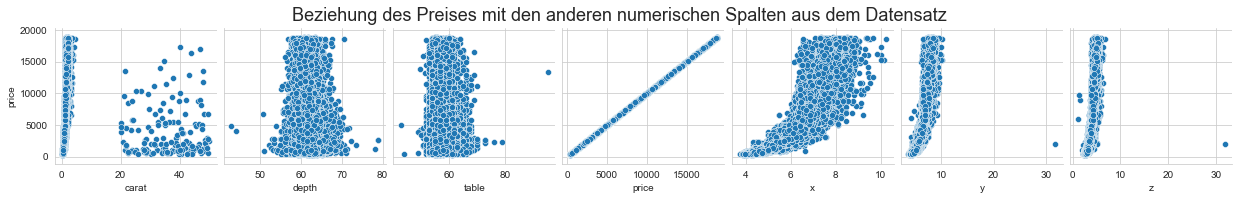

In [11]:
sns.set_style("whitegrid")
g =sns.pairplot(df,y_vars = ['price'],diag_kind = None)
g.fig.suptitle("Beziehung des Preises mit den anderen numerischen Spalten aus dem Datensatz",y=1.07, fontsize=18);
#g.axes[0,0].set_xlim((0,60));

Ausreißer bei carat, table, y und z.

In [12]:
print(df["carat"].quantile(0.95))
print((df["carat"]>df["carat"].quantile(0.95)).value_counts())

1.72
False    45550
True      2370
Name: carat, dtype: int64


Auswahl des 95% Perzentil für carat. 

Entfernung der Ausreißer und Duplikate.

In [13]:
df=df.loc[(df[["y","z"]] != 31.8).all(axis=1)]
df=df.loc[(df[["table"]] != 95).all(axis=1)]
df=df.loc[(df[["carat"]] < 1.72).all(axis=1)]
df=df.drop_duplicates()

In [14]:
df.describe().applymap(lambda x: f"{x:0.2f}")

,carat,depth,table,price,x,y,z
count,45397.00,45397.00,45397.00,45397.00,45397.00,45397.00,45397.00
mean,0.73,61.75,57.42,3412.67,5.61,5.61,3.47
std,0.38,1.40,2.22,3239.54,1.00,0.99,0.62
min,0.20,43.00,43.00,326.00,3.73,3.68,1.07
25%,0.39,61.10,56.00,919.00,4.68,4.69,2.89
50%,0.70,61.80,57.00,2239.00,5.63,5.63,3.47
75%,1.01,62.50,59.00,4838.00,6.46,6.45,4.00
max,1.71,79.00,79.00,18806.00,8.02,7.92,5.06


<p>Neuer Datensatz enthält noch 45.397 Werte von ursprünglich 50.000.<br>
Es wurden Nullwerte bei x, y und z, alle NaN Werte, Ausreißer und Duplikate entfernt.</p>

In [15]:
#print(df["cut"].value_counts())
#print(df["color"].value_counts())
#print(df["clarity"].value_counts())

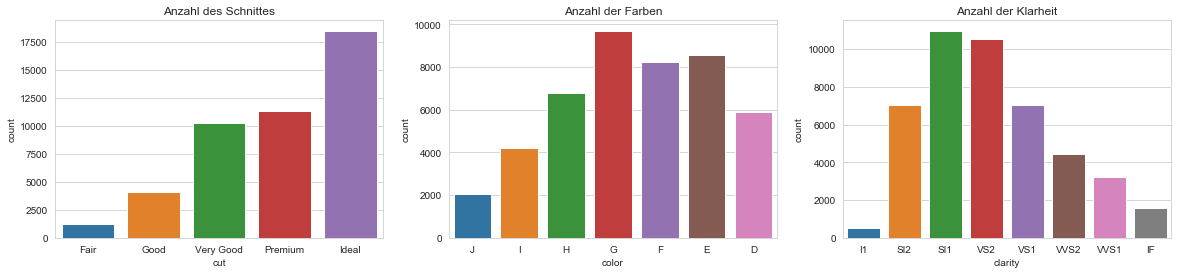

In [16]:
fig, axes = plt.subplots(1,3, figsize=(20,4))
sns.countplot(data=df,x="cut", order=["Fair", "Good", "Very Good", "Premium", "Ideal"], ax=axes[0])
axes[0].title.set_text("Anzahl des Schnittes")
sns.countplot(data=df,x="color", order=["J", "I", "H", "G", "F", "E", "D"], ax=axes[1])
axes[1].title.set_text("Anzahl der Farben")
sns.countplot(data=df,x="clarity", order=["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"], ax=axes[2])
axes[2].title.set_text("Anzahl der Klarheit")

Countplots für "cut", "color" und "clarity". Auffallend ist, dass im Datensatz beim "cut" vorallem die besseren Schnitte dominieren. Dies liegt wohl daran, dass "cut" im Gegensatz zu "color" und "clarity" nicht naturgegeben ist, sondern von Menschen/ Maschinen durchgeführt wird.

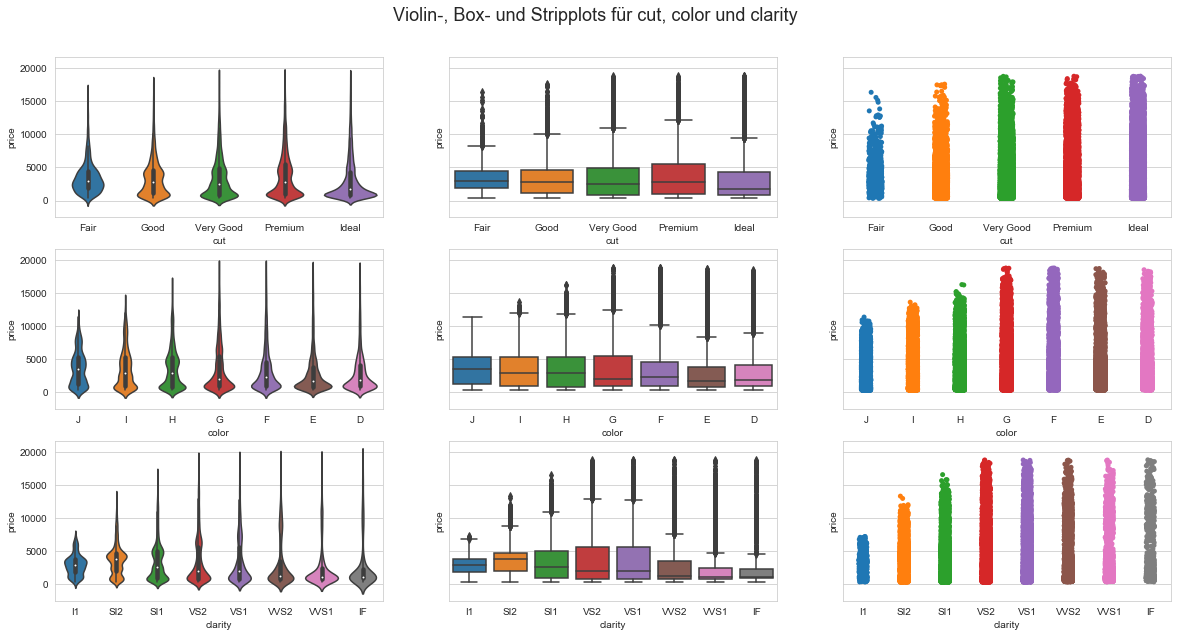

In [17]:
fig, axes = plt.subplots(3,3, figsize=(20,10),sharey=True)
plt.suptitle("Violin-, Box- und Stripplots für cut, color und clarity", fontsize=18, y=0.95)
sns.violinplot(x="cut", y="price", data=df, order=["Fair", "Good", "Very Good", "Premium", "Ideal"], ax=axes[0,0])
sns.boxplot(x="cut", y="price", data=df, order=["Fair", "Good", "Very Good", "Premium", "Ideal"], ax=axes[0,1])
sns.stripplot(x="cut", y="price", data=df, order=["Fair", "Good", "Very Good", "Premium", "Ideal"], ax=axes[0,2])
sns.violinplot(x="color", y="price", data=df, order=["J", "I", "H", "G", "F", "E", "D"], ax=axes[1,0])
sns.boxplot(x="color", y="price", data=df, order=["J", "I", "H", "G", "F", "E", "D"], ax=axes[1,1])
sns.stripplot(x="color", y="price", data=df, order=["J", "I", "H", "G", "F", "E", "D"], ax=axes[1,2])
sns.violinplot(x="clarity", y="price", data=df, order=["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"], ax=axes[2,0])
sns.boxplot(x="clarity", y="price", data=df, order=["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"], ax=axes[2,1])
sns.stripplot(x="clarity", y="price", data=df, order=["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"], ax=axes[2,2]);

Es lässt sich nicht erkennen, dass der Preis positiv von "cut", "color" oder "clarity" beeinflusst wird.

Umwandlung der Objekte "cut", "color" und "clarity" in integers.

In [18]:
#df = pd.get_dummies(df, prefix={"color":"color", "cut":"cut","clarity":"clarity"},drop_first=True)

In [19]:
try:
    df[["cut", "color","clarity"]].apply(lambda x: x.astype("str"))
    df["cut"] = df["cut"].replace(["Fair","Good","Very Good","Premium","Ideal"],[1,2,3,4,5])
    df["color"] = df["color"].replace(["J","I","H","G","F","E","D"],[1,2,3,4,5,6,7])
    df["clarity"] = df["clarity"].replace(["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"],[1,2,3,4,5,6,7,8])
    df[["cut", "color","clarity"]].apply(pd.to_numeric, errors='coerce').fillna(0)
    print("umgewandelt")
except:
    print("Bereits umgewandelt")

umgewandelt


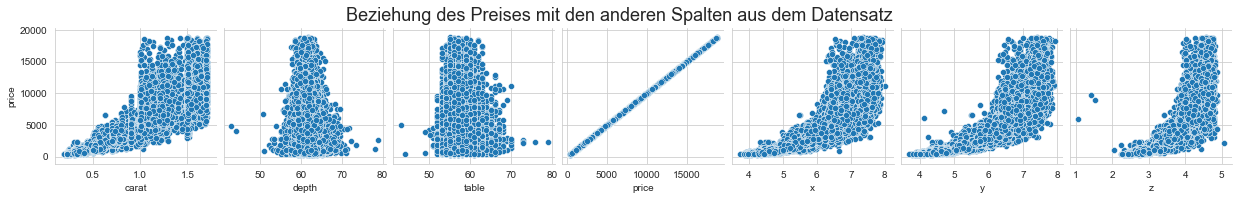

In [20]:
g=sns.pairplot(df,y_vars = ['price'], x_vars=["carat", "depth", "table","price","x","y","z"], diag_kind = None)
g.fig.suptitle("Beziehung des Preises mit den anderen Spalten aus dem Datensatz",y=1.07, fontsize=18);

Carat, x, y und z sind wohl positiv mit dem Preis korreliert.

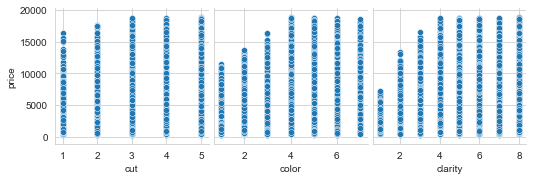

In [21]:
g =sns.pairplot(df,y_vars = ["price"], x_vars=["cut", "color", "clarity"],diag_kind = None)

Wohl keine Korrelation von cut, color und clarity mit dem Preis

In [22]:
corr = df.corr()
corr.style.applymap(lambda x: "background-color : yellow" if x >=0.80 and x<1 else 
                    ("background-color : green" if x==1 else ""))

,carat,cut,color,clarity,depth,table,price,x,y,z
carat,1.000000,-0.132822,-0.222336,-0.315240,0.025505,0.173131,0.899586,0.985837,0.985048,0.983942
cut,-0.132822,1.000000,0.013296,0.185515,-0.211667,-0.439266,-0.039683,-0.120838,-0.120430,-0.147838
color,-0.222336,0.013296,1.000000,-0.055224,-0.052234,-0.010473,-0.080754,-0.206016,-0.205636,-0.211543
clarity,-0.315240,0.185515,-0.055224,1.000000,-0.063439,-0.156695,-0.065824,-0.336075,-0.330064,-0.339319
depth,0.025505,-0.211667,-0.052234,-0.063439,1.000000,-0.294575,-0.011866,-0.031118,-0.034411,0.098753
table,0.173131,-0.439266,-0.010473,-0.156695,-0.294575,1.000000,0.104028,0.183821,0.176834,0.141175
price,0.899586,-0.039683,-0.080754,-0.065824,-0.011866,0.104028,1.000000,0.867114,0.869157,0.861833
x,0.985837,-0.120838,-0.206016,-0.336075,-0.031118,0.183821,0.867114,1.000000,0.998345,0.989792
y,0.985048,-0.120430,-0.205636,-0.330064,-0.034411,0.176834,0.869157,0.998345,1.000000,0.989364
z,0.983942,-0.147838,-0.211543,-0.339319,0.098753,0.141175,0.861833,0.989792,0.989364,1.000000


Höchste Korrelation zwischen carat und price.

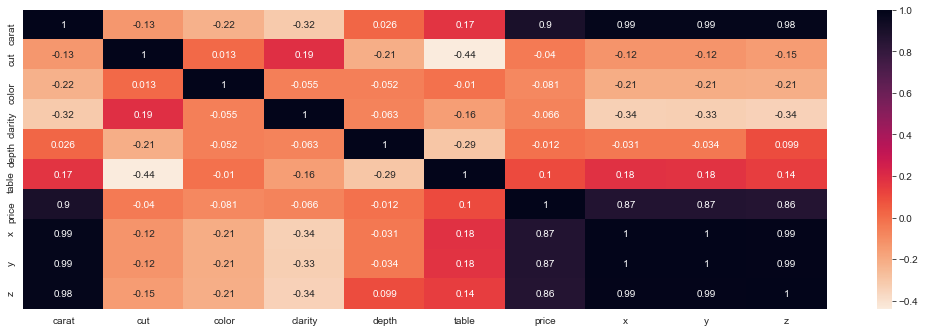

In [23]:
plt.figure(figsize=(18,5.5))
sns.heatmap(corr, cmap="rocket_r",annot=True,)
plt.show()

#### Vorbereitung und Durchführung der SVR

Im Folgenden wird aus dem Datensatz mit 45.397 Zeilen eine zufällige Stichprobe in Höhe von 10% des ursprünglichen Datensatzes entnommen, da der SVR Algorithmus bei großen Datensätzen sehr langsam ist.

In [24]:
df_sample = df.sample(frac=0.1, random_state = 42)
df_sample=df_sample.sort_values(by=["carat", "price"])
df_sample= df_sample.drop_duplicates(subset=["carat","price"])

In [25]:
corr = df_sample.corr()
corr.style.applymap(lambda x: "background-color : yellow" if x >=0.80 and x<1 else 
                    ("background-color : green" if x==1 else ""))

,carat,cut,color,clarity,depth,table,price,x,y,z
carat,1.000000,-0.123130,-0.225293,-0.296634,0.012444,0.183844,0.890575,0.984450,0.982933,0.983627
cut,-0.123130,1.000000,0.011908,0.181761,-0.206080,-0.468255,-0.020277,-0.109990,-0.109645,-0.138253
color,-0.225293,0.011908,1.000000,-0.038400,-0.048021,-0.006932,-0.069610,-0.209902,-0.209170,-0.216372
clarity,-0.296634,0.181761,-0.038400,1.000000,-0.061160,-0.158921,-0.027741,-0.318280,-0.310373,-0.321946
depth,0.012444,-0.206080,-0.048021,-0.061160,1.000000,-0.297323,-0.032183,-0.050558,-0.053599,0.091462
table,0.183844,-0.468255,-0.006932,-0.158921,-0.297323,1.000000,0.101335,0.200052,0.191837,0.153419
price,0.890575,-0.020277,-0.069610,-0.027741,-0.032183,0.101335,1.000000,0.858598,0.861787,0.853110
x,0.984450,-0.109990,-0.209902,-0.318280,-0.050558,0.200052,0.858598,1.000000,0.997258,0.989049
y,0.982933,-0.109645,-0.209170,-0.310373,-0.053599,0.191837,0.861787,0.997258,1.000000,0.988239
z,0.983627,-0.138253,-0.216372,-0.321946,0.091462,0.153419,0.853110,0.989049,0.988239,1.000000


Korrelationen des verkleinerten Datensatzes.

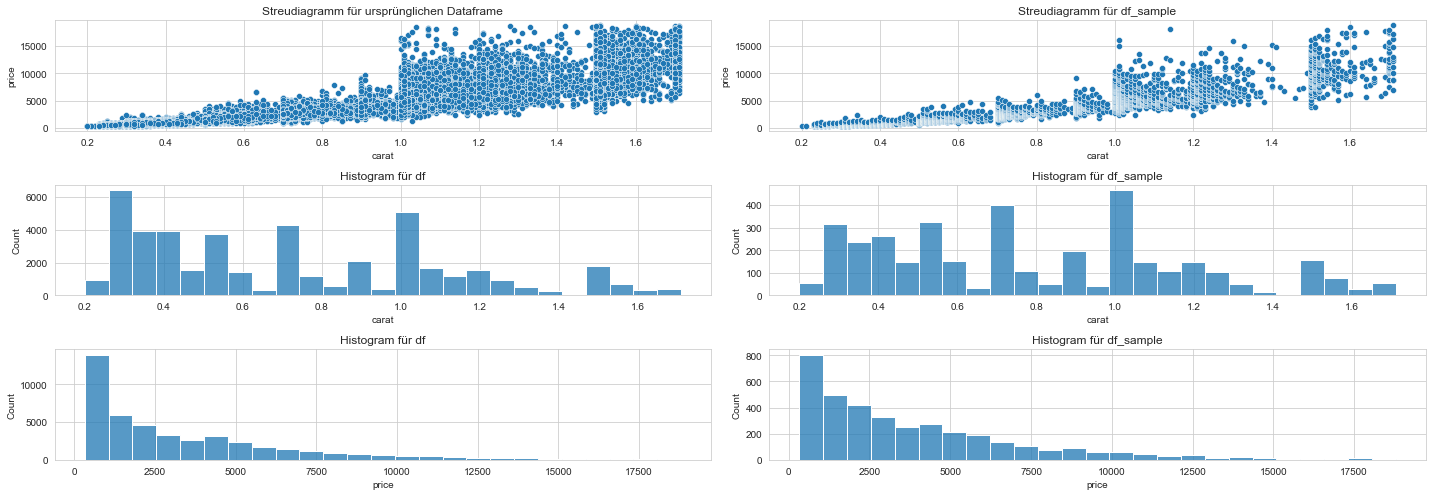

In [26]:
fig, axes = plt.subplots(3,2, figsize=(20,7))
sns.scatterplot(data=df, x="carat",y="price",ax=axes[0,0])
axes[0,0].title.set_text("Streudiagramm für ursprünglichen Dataframe")
sns.histplot(data=df, x="carat",bins=25, ax=axes[1,0])
axes[1,0].title.set_text("Histogram für df")
sns.histplot(data=df, x="price",bins=25, ax=axes[2,0])
axes[2,0].title.set_text("Histogram für df")
sns.scatterplot(data=df_sample, x="carat",y="price",ax=axes[0,1])
axes[0,1].title.set_text("Streudiagramm für df_sample")
sns.histplot(data=df_sample, x="carat",bins=25, ax=axes[1,1])
axes[1,1].title.set_text("Histogram für df_sample")
sns.histplot(data=df_sample, x="price",bins=25, ax=axes[2,1])
axes[2,1].title.set_text("Histogram für df_sample")
plt.tight_layout();

In [27]:
#fig = px.scatter(df_sample, x="carat", y="price",color="price")
#fig.update_layout(title_text="Preis in Abhängigkeit vom carat", title_x=0.5)
#fig.show()

In [28]:
alt.Chart(df_sample, title="Preis in Abhängigkeit vom carat").mark_circle(size=60).encode(
    x=alt.X("carat", axis=alt.Axis(grid=False)),
    y=alt.Y("price", axis=alt.Axis(grid=False)),
    color=alt.Color("price", scale=alt.Scale(scheme="plasma")),
    tooltip=["carat", "price"]).interactive().properties(width=800,height=400)

alt.Chart(...)

In [29]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

X: unabhängige Variable\
y: abhängige Variable

In [30]:
X = df_sample[["carat"]].values
y = df_sample["price"].values

Aufteilung des Datensatzes in Training und Testdaten. 70% sind Traingsdaten, 30% Testdaten.

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [32]:
print("X_train:",X_train.shape)
print("X_test:",X_test.shape)
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)

X_train: (2580, 1)
X_test: (1107, 1)
y_train: (2580,)
y_test: (1107,)


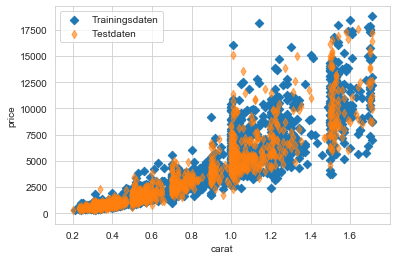

In [33]:
plt.scatter(X_train,y_train,marker="D",label="Trainingsdaten")
plt.scatter(X_test,y_test,marker="d", alpha=0.6,label="Testdaten")
plt.xlabel("carat")
plt.ylabel("price")
plt.legend();

MinMaxScaler: Neuskalierung im Bereich [0, 1], wird in diesem Beispiel nicht genutzt.

In [34]:
#sc=MinMaxScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform (X_test)

Standardscaler: Standardisierung von Daten (mean = 0 und standard deviation = 1). X Werte werden standardisiert.

In [35]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)

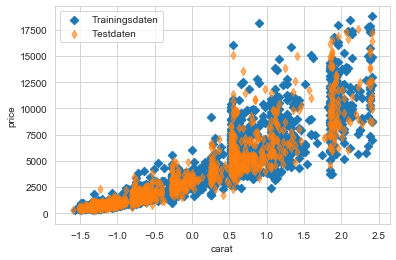

In [36]:
plt.scatter(X_train,y_train,marker="D",label="Trainingsdaten")
plt.scatter(X_test,y_test,marker="d", alpha=0.6,label="Testdaten")
plt.xlabel("carat")
plt.ylabel("price")
plt.legend();

Auswahl des Machine Learning Algorithmus: **Support Vector Regression**

class sklearn.svm.**SVR(*, kernel='rbf', degree=3, gamma='scale', coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=- 1)**

Im folgenden werden die Modelle mit unterschiedlichen Kernel trainiert und getestet.
<ul>
<li>model_1 = rbf</li>
<li>model_2 = poly</li>
<li>model_3 = sigmoid</li>
<li>model_4 = linear</li>
</ul>

In [37]:
model_1 = SVR()
model_1.fit(X_train, y_train)
y_pred_1 = model_1.predict(X_test)
model_1_train=model_1.score(X_train, y_train)
model_1_test=model_1.score(X_test, y_test)
print("Trainingsdaten:",model_1_train)
print("Testdaten:",model_1_test)
print("MSE:", mean_squared_error(y_test, y_pred_1))

Trainingsdaten: 0.15627864476624495
Testdaten: 0.1658659894856912
MSE: 9591728.35397903


In [38]:
model_2 = SVR( kernel="poly")
model_2.fit(X_train, y_train)
y_pred_2 = model_2.predict(X_test)
model_2_train=model_2.score(X_train, y_train)
model_2_test=model_2.score(X_test, y_test)
print("Trainingsdaten:",model_2_train)
print("Testdaten:",model_2_test)
print("MSE:", mean_squared_error(y_test, y_pred_2))

Trainingsdaten: 0.5790230028964756
Testdaten: 0.6091708778697031
MSE: 4494154.08680737


In [39]:
model_3 = SVR( kernel="sigmoid")
model_3.fit(X_train, y_train)
y_pred_3 = model_3.predict(X_test)
model_3_train=model_3.score(X_train, y_train)
model_3_test=model_3.score(X_test, y_test)
print("Trainingsdaten:",model_3_train)
print("Testdaten:",model_3_test)
print("MSE:", mean_squared_error(y_test, y_pred_3))

Trainingsdaten: 0.38104900780660345
Testdaten: 0.3896341922488736
MSE: 7018612.05838623


In [40]:
model_4 = SVR( kernel="linear")
model_4.fit(X_train, y_train)
y_pred_4 = model_4.predict(X_test)
model_4_train=model_4.score(X_train, y_train)
model_4_test=model_4.score(X_test, y_test)
print("Trainingsdaten:",model_4_train)
print("Testdaten:",model_4_test)
print("MSE:", mean_squared_error(y_test, y_pred_4))

Trainingsdaten: 0.5684624702023828
Testdaten: 0.5811991952945967
MSE: 4815801.181257725


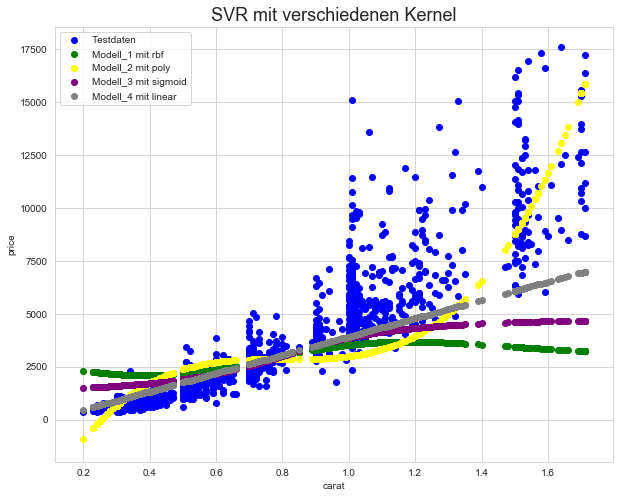

In [41]:
plt.figure(figsize=(10,8))
plt.scatter(sc.inverse_transform(X_test), y_test,   color = "blue", label= "Testdaten")
plt.scatter(sc.inverse_transform(X_test),y_pred_1, color = "green", label="Modell_1 mit rbf")
plt.scatter(sc.inverse_transform(X_test), y_pred_2, color = "yellow", label="Modell_2 mit poly")
plt.scatter(sc.inverse_transform(X_test), y_pred_3, color = "purple", label="Modell_3 mit sigmoid")
plt.scatter(sc.inverse_transform(X_test), y_pred_4, color = "grey", label="Modell_4 mit linear")
plt.xlabel("carat")
plt.ylabel("price")
plt.title("SVR mit verschiedenen Kernel", fontsize=18)
plt.legend();

In [42]:
score=[[model_1_train,model_2_train,model_3_train,model_4_train],
        [model_1_test,model_2_test,model_3_test,model_4_test]]

In [43]:
pd.DataFrame(score, columns=["model_1 (rbf)","model_2 (poly)","model_3 (sigmoid)","model_4 (linear)"],
             index=["Score Trainigsdaten","Score Testdaten"])

,model_1 (rbf),model_2 (poly),model_3 (sigmoid),model_4 (linear)
Score Trainigsdaten,0.156279,0.579023,0.381049,0.568462
Score Testdaten,0.165866,0.609171,0.389634,0.581199


Linear und Poly schneiden am Besten ab.

C: float, default=1.0

    Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.
    
    Fehlertoleranz: hohes C führt zu strenger "Bestrafung" bei Ausreißern, komplexeren Modellen aber kann auch zu overfitting füheren. Kleines C neigt dazu Ausreißer nicht zu erkennen und zu stark zu generalisieren.

Im folgenden werden verschiedene Parameter für C bei den kernels "rbf" und "linear" getestet.

In [44]:
model_5 = SVR( kernel="linear", C=0.1)
model_5.fit(X_train, y_train)
y_pred_5 = model_5.predict(X_test)
model_5_train=model_5.score(X_train, y_train)
model_5_test=model_5.score(X_test, y_test)
print("Trainingsdaten:",model_5_train)
print("Testdaten:",model_5_test)
print("MSE:", mean_squared_error(y_test, y_pred_5))

Trainingsdaten: 0.01677319057357829
Testdaten: 0.03390024075183762
MSE: 11109205.879088126


In [45]:
model_6 = SVR( kernel="linear", C=2)
model_6.fit(X_train, y_train)
y_pred_6 = model_6.predict(X_test)
model_6_train=model_6.score(X_train, y_train)
model_6_test=model_6.score(X_test, y_test)
print("Trainingsdaten:",model_6_train)
print("Testdaten:",model_6_test)
print("MSE:", mean_squared_error(y_test, y_pred_6))

Trainingsdaten: 0.6667973291591216
Testdaten: 0.6785316561761805
MSE: 3696572.7203239547


In [46]:
model_7 = SVR( kernel="linear", C=50)
model_7.fit(X_train, y_train)
y_pred_7 = model_7.predict(X_test)
model_7_train=model_7.score(X_train, y_train)
model_7_test=model_7.score(X_test, y_test)
print("Trainingsdaten:",model_7_train)
print("Testdaten:",model_7_test)
print("MSE:", mean_squared_error(y_test, y_pred_7))

Trainingsdaten: 0.7545821193515536
Testdaten: 0.7672592011240121
MSE: 2676292.4081348786


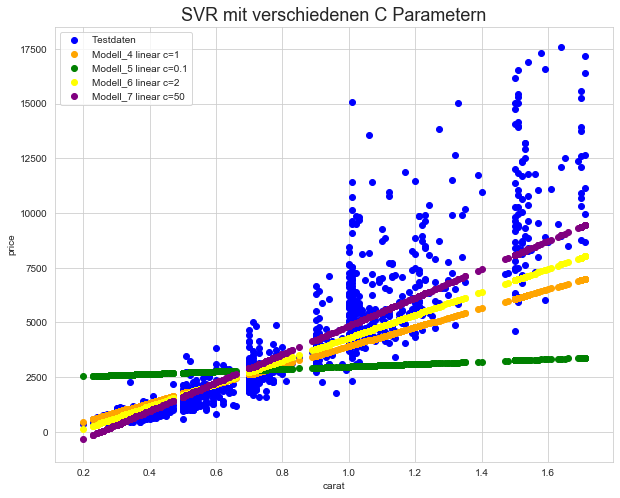

In [47]:
plt.figure(figsize=(10,8))
plt.scatter(sc.inverse_transform(X_test), y_test, color = "blue", label= "Testdaten")
plt.scatter(sc.inverse_transform(X_test), y_pred_4, color = "orange", label="Modell_4 linear c=1")
plt.scatter(sc.inverse_transform(X_test), y_pred_5, color = "green", label="Modell_5 linear c=0.1")
plt.scatter(sc.inverse_transform(X_test), y_pred_6, color = "yellow", label="Modell_6 linear c=2")
plt.scatter(sc.inverse_transform(X_test), y_pred_7, color = "purple", label="Modell_7 linear c=50")
plt.xlabel("carat")
plt.ylabel("price")
plt.title("SVR mit verschiedenen C Parametern", fontsize=18)
plt.legend();

In [48]:
score=[[model_4_train,model_5_train,model_6_train,model_7_train],
        [model_4_test,model_5_test,model_6_test,model_7_test]]

In [49]:
pd.DataFrame(score, columns=["model_4 c=1","model_5 c=0.5", "model_6 c=2", "model_7 c=50"],
             index=["Score Trainigsdaten","Score Testdaten"])

,model_4 c=1,model_5 c=0.5,model_6 c=2,model_7 c=50
Score Trainigsdaten,0.568462,0.016773,0.666797,0.754582
Score Testdaten,0.581199,0.033900,0.678532,0.767259


In [50]:
model_8 = SVR(C=100)
model_8.fit(X_train, y_train)
y_pred_8 = model_8.predict(X_test)
model_8_train=model_8.score(X_train, y_train)
model_8_test=model_8.score(X_test, y_test)
print("Trainingsdaten:",model_8_train)
print("Testdaten:",model_8_test)
print("MSE:", mean_squared_error(y_test, y_pred_8))

Trainingsdaten: 0.786243685451665
Testdaten: 0.7993545868501999
MSE: 2307226.7455179626


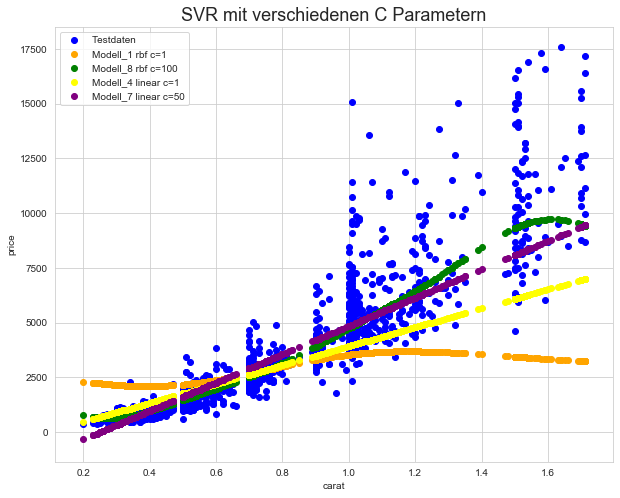

In [51]:
plt.figure(figsize=(10,8))
plt.scatter(sc.inverse_transform(X_test), y_test, color = "blue", label= "Testdaten")
plt.scatter(sc.inverse_transform(X_test), y_pred_1, color = "orange", label="Modell_1 rbf c=1")
plt.scatter(sc.inverse_transform(X_test), y_pred_8, color = "green", label="Modell_8 rbf c=100")
plt.scatter(sc.inverse_transform(X_test), y_pred_4, color = "yellow", label="Modell_4 linear c=1")
plt.scatter(sc.inverse_transform(X_test), y_pred_7, color = "purple", label="Modell_7 linear c=50")
plt.xlabel("carat")
plt.ylabel("price")
plt.title("SVR mit verschiedenen C Parametern", fontsize=18)
plt.legend();

In [52]:
score=[[model_1_train,model_8_train,model_4_train,model_7_train],
        [model_1_test,model_8_test,model_4_test,model_7_test]]

In [53]:
pd.DataFrame(score, columns=["model_1 rbf c=1","model_8 rbf c=100", "model_4 linear c=1", "model_7 linear c=100"],
             index=["Score Trainigsdaten","Score Testdaten"])

,model_1 rbf c=1,model_8 rbf c=100,model_4 linear c=1,model_7 linear c=100
Score Trainigsdaten,0.156279,0.786244,0.568462,0.754582
Score Testdaten,0.165866,0.799355,0.581199,0.767259


epsilon: float, default=0.1

    Epsilon in the epsilon-SVR model. It specifies the epsilon-tube within which no penalty is associated in the           training loss function with points predicted within a distance epsilon from the actual value.
    
    Der Wert von ϵ definiert einen Toleranzbereich, bei dem Fehler nicht bestraft werden. Größeres ϵ bedeutet               weniger Stützvektoren.

<img src="https://www.mdpi.com/water/water-11-01231/article_deploy/html/images/water-11-01231-g002-550.jpg" width="300" height="300" />

In [54]:
model_9 = SVR(C=100,epsilon=0.01)
model_9.fit(X_train, y_train)
y_pred_9 = model_9.predict(X_test)
model_9_train=model_9.score(X_train, y_train)
model_9_test=model_9.score(X_test, y_test)
print("Trainingsdaten:",model_9_train)
print("Testdaten:",model_9_test)
print("MSE:", mean_squared_error(y_test, y_pred_9))

Trainingsdaten: 0.7862516900048154
Testdaten: 0.7993623967750275
MSE: 2307136.9389923126


In [55]:
model_10 = SVR(C=100,epsilon=300)
model_10.fit(X_train, y_train)
y_pred_10 = model_10.predict(X_test)
model_10_train=model_10.score(X_train, y_train)
model_10_test=model_10.score(X_test, y_test)
print("Trainingsdaten:",model_10_train)
print("Testdaten:",model_10_test)
print("MSE:", mean_squared_error(y_test, y_pred_10))

Trainingsdaten: 0.7881284590271517
Testdaten: 0.8014549781365142
MSE: 2283074.2923132684


In [56]:
model_11 = SVR(C=100,epsilon=4000)
model_11.fit(X_train, y_train)
y_pred_11 = model_11.predict(X_test)
model_11_train=model_11.score(X_train, y_train)
model_11_test=model_11.score(X_test, y_test)
print("Trainingsdaten:",model_11_train)
print("Testdaten:",model_11_test)
print("MSE:", mean_squared_error(y_test, y_pred_11))

Trainingsdaten: 0.19598401014406452
Testdaten: 0.21398940537235792
MSE: 9038355.961974705


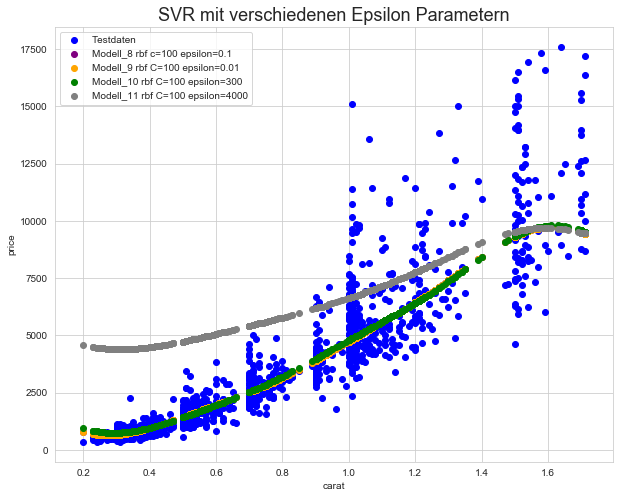

In [57]:
plt.figure(figsize=(10,8))
plt.scatter(sc.inverse_transform(X_test), y_test, color = "blue", label= "Testdaten")
plt.scatter(sc.inverse_transform(X_test), y_pred_8, color = "purple", label="Modell_8 rbf c=100 epsilon=0.1")
plt.scatter(sc.inverse_transform(X_test), y_pred_9, color = "orange", label="Modell_9 rbf C=100 epsilon=0.01")
plt.scatter(sc.inverse_transform(X_test), y_pred_10, color = "green", label="Modell_10 rbf C=100 epsilon=300")
plt.scatter(sc.inverse_transform(X_test), y_pred_11, color = "grey", label="Modell_11 rbf C=100 epsilon=4000")
plt.xlabel("carat")
plt.ylabel("price")
plt.title("SVR mit verschiedenen Epsilon Parametern", fontsize=18)
plt.legend();

Nachdem C bereits optimiert wurde, ist in unserem Datensatz bei Parameter epsilon nur noch wenig Optimierung möglich. Zu hohes epsilon verschlechtert Score stark, da zu wenige Stützvektoren vorhanden.

Im Folgenden wird versucht mit GridSearchCV das beste Modell für die Daten zu ermitteln.

In [58]:
best_model = GridSearchCV(SVR(), param_grid = 
                   {"kernel": ("rbf", "linear", "poly"),
                    "C":[100,1000],
                    "epsilon":[0.1,300,1000],
                    #"gamma": [0.1,1,10]
                   },verbose=1)
best_model.fit(X_train, y_train)

print("Beste Parameter:", best_model.best_params_)
print("Bester Score:", best_model.best_score_)
print("Bester Score:", best_model.best_estimator_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:   27.9s finished


Beste Parameter: {'C': 1000, 'epsilon': 300, 'kernel': 'rbf'}
Bester Score: 0.796451488056417
Bester Score: SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=300, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [59]:
model_12 = SVR(C=1000,epsilon=300)
model_12.fit(X_train, y_train)
y_pred_12 = model_12.predict(X_test)
model_12_train=model_12.score(X_train, y_train)
model_12_test=model_12.score(X_test, y_test)
print("Trainingsdaten:",model_12_train)
print("Testdaten:",model_12_test)
print("MSE:", mean_squared_error(y_test, y_pred_12))

Trainingsdaten: 0.800298093164452
Testdaten: 0.8154505580112695
MSE: 2122138.76082439


In [60]:
X_carat = np.array([1]).reshape(1,-1)
X_carat_scaled=sc.transform(X_carat)
X_carat_result = model_12.predict(X_carat_scaled)
print("Der Diamant kostet:",X_carat_result)

Der Diamant kostet: [4875.30257399]


Der durchschnittliche Preis, den Menschen für einen 1-Karat-Diamanten ausgeben, liegt bei 4000-6000 Euro.

In [61]:
from sklearn.linear_model import LinearRegression
model_13 = LinearRegression()
model_13.fit(X_train, y_train)
y_pred_13 = model_13.predict(X_test)
model_13_train=model_13.score(X_train, y_train)
model_13_test=model_13.score(X_test, y_test)
print("Trainingsdaten:",model_13_train)
print("Testdaten:",model_13_test)
print("MSE:", mean_squared_error(y_test, y_pred_13))

Trainingsdaten: 0.7878570731635385
Testdaten: 0.8046888133231581
MSE: 2245888.3386645233


In [62]:
from sklearn.ensemble import GradientBoostingRegressor
model_14=GradientBoostingRegressor(n_estimators=100)
model_14.fit(X_train, y_train)
y_pred_14 = model_14.predict(X_test)
model_14_train=model_14.score(X_train, y_train)
model_14_test=model_14.score(X_test, y_test)
print("Trainingsdaten:",model_14_train)
print("Testdaten:",model_14_test)
print("MSE:", mean_squared_error(y_test, y_pred_14))

Trainingsdaten: 0.8234221239084463
Testdaten: 0.8135327933935494
MSE: 2144191.185288779


In [63]:
from sklearn.ensemble import RandomForestRegressor
model_15=RandomForestRegressor(n_estimators=100)
model_15.fit(X_train, y_train)
y_pred_15 = model_15.predict(X_test)
model_15_train=model_15.score(X_train, y_train)
model_15_test=model_15.score(X_test, y_test)
print("Trainingsdaten:",model_15_train)
print("Testdaten:",model_15_test)
print("MSE:", mean_squared_error(y_test, y_pred_15))

Trainingsdaten: 0.8257987926142365
Testdaten: 0.8080150258351199
MSE: 2207640.1357856207


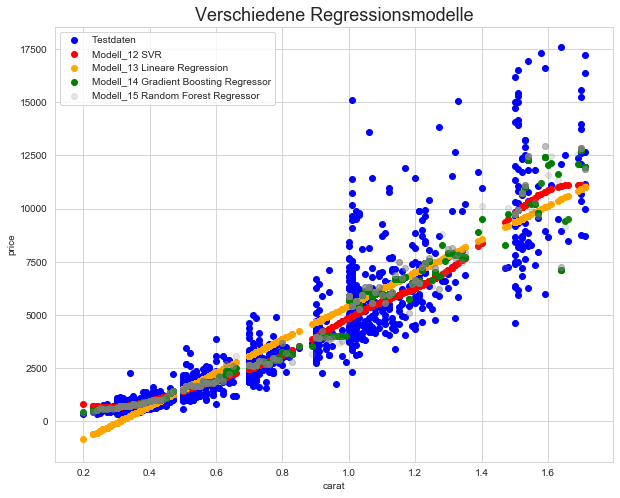

In [64]:
plt.figure(figsize=(10,8))
plt.scatter(sc.inverse_transform(X_test), y_test, color = "blue", label= "Testdaten")
plt.scatter(sc.inverse_transform(X_test), y_pred_12, color = "red", label="Modell_12 SVR")
plt.scatter(sc.inverse_transform(X_test), y_pred_13, color = "orange", label="Modell_13 Lineare Regression")
plt.scatter(sc.inverse_transform(X_test), y_pred_14, color = "green", label="Modell_14 Gradient Boosting Regressor")
plt.scatter(sc.inverse_transform(X_test), y_pred_15, color = "grey", label="Modell_15 Random Forest Regressor", alpha=0.2)
plt.xlabel("carat")
plt.ylabel("price")
plt.title("Verschiedene Regressionsmodelle", fontsize=18)
plt.legend();

https://share.streamlit.io/tobiarnold/support-vector-regression/main/main.py